# Predicting Automobile Prices using Multiple Linear Regression

This project aims to use linear regression in order to model car prices using correlated features. Specifically, we'll be using the dataset from the 1985 Ward's Automotive Yearbook to determine if we can predict the price of a car based on highly associated features and infer the car prices for each feature used.

The following concepts are used for this project:
- Data Cleaning
- Data Manipulation
- Correlation
- Linear Regression modelling

### Loading the packages

In [1]:
# for data cleaning/manipulation
import numpy as np
import pandas as pd

# for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# for Linear modelling
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

### Loading the dataset

The original dataset contains information on 205 cars for each of the 26 variables. To find out more about the column descriptions, you may visit here: https://archive.ics.uci.edu/ml/datasets/Automobile

In [2]:
cars = pd.read_csv("imports-85.data", header=None, na_values="?") # header = None since file does not have headers
cars.head(10) # displays the first 10 rows

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


In [3]:
cars.shape # prints the dimensions of the dataset

(205, 26)

### Adding the column names

In [4]:
cars.columns = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels',
                'engine-location','wheel-base','length','width','height','curb-weight','engine-type',
                'num-of-cylinders','engine-size','fuel-system','bore', 'stroke','compression-ratio',
                'horsepower','peak-rpm','city-mpg','highway-mpg','price']
cars.head(10) # displays the first 10 rows

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,15250.0
6,1,158.0,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,17710.0
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110.0,5500.0,19,25,18920.0
8,1,158.0,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140.0,5500.0,17,20,23875.0
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160.0,5500.0,16,22,NaN


### Inspecting the data types

Before proceeding with the modelling proper, each feature is inspected to ensure proper type classification. Since we've already replaced most of the "?" in the data file, there is no need to pre-process the data.

In [5]:
cars.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

### Plotting the correlation matrix

A heatmap is then created to plot the correlation of each pair of features. Lighter/darker hues indicate either highly positively/negative correlation.

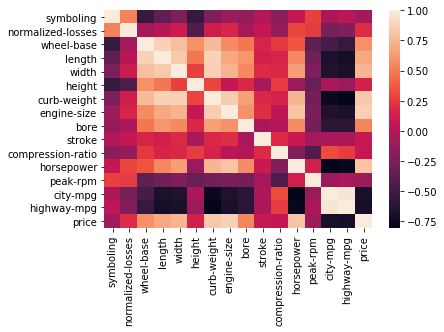

In [6]:
sns.heatmap(cars.corr())

### Obtaining Features which are Highly Correlated with Price

The treshold of correlation is set to 0.6 and above (positive and negative). This implies that features with these coefficients are likely to have a strong association with price.

In [7]:
highly_correlated = abs(cars.corr()['price']) > 0.6 # selecting features highly correlated with price
cars.corr()['price'][highly_correlated]

length         0.690628
width          0.751265
curb-weight    0.834415
engine-size    0.872335
horsepower     0.810533
city-mpg      -0.686571
highway-mpg   -0.704692
price          1.000000
Name: price, dtype: float64

In [8]:
features = cars.corr()['price'][highly_correlated].index.tolist() # getting the names of each highly-correlated feature
features

['length',
 'width',
 'curb-weight',
 'engine-size',
 'horsepower',
 'city-mpg',
 'highway-mpg',
 'price']

### Removing Missing Values

A copy of the cars dataset will then be created to include only the features above. To ensure that the model works, rows with missing values are removed. 

In [9]:
cars_modified = cars[features].dropna()
cars_modified.shape

(199, 8)

### Removing Outliers

Cars with extremely high prices could affect the prediction for the rest of the cars, given that majority of the prices ranged from USD 5000-15000. To prevent this from happening, the dataset is to be filtered to include prices less than USD 15000

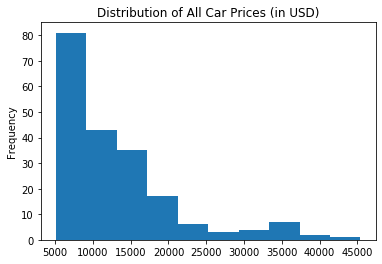

In [10]:
cars_modified['price'].plot.hist() # creating a histogram for car prices
plt.title('Distribution of All Car Prices (in USD)')
plt.show()

In [11]:
cars_modified = cars_modified[cars_modified['price'] < 15000] # including only cars of up to USD 15,000
cars_modified.shape

(137, 8)

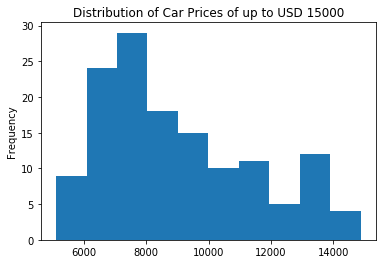

In [12]:
cars_modified['price'].plot.hist() # creating a histogram for car prices
plt.title('Distribution of Car Prices of up to USD 15000')
plt.show()

### Partitioning the Dataset

Two sets of data will be created from the main dataset (test and train). 80% of the dataset will be used for training the model using the features while 20% will be used to test the accuracy of the model.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(cars_modified[features[:7]], 
                                                    cars_modified['price'], 
                                                    test_size = 0.2, 
                                                    random_state = 1) # random state ensures replicability of results

### Creating the Linear Regression Model

In [14]:
lm = LinearRegression() # creates a linear regression object
model = lm.fit(X_train, y_train) # fits the training dataset
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Assessing the Model

After the model is created, the remaining test dataset is used to make predictions.

In [15]:
y_predictions = model.predict(X_test) # predicts using the features of the test dataset
y_predictions

array([ 9475.32796603,  6688.99480333,  9501.41111249, 10918.37313269,
       10898.56066758,  6613.16000873,  6792.58395209,  6742.54376137,
       10026.18757399,  9781.29156056,  7438.29273648,  9036.80380959,
       10026.18757399,  6784.65118991,  6651.30077999,  9127.76772515,
        8939.33185187,  9227.59603682,  6888.35345513, 12117.81168668,
        9058.09535027,  6349.1885562 , 14430.04162682,  6627.64947261,
       10946.47296604,  7045.82611298,  6964.13211755, 11371.3868808 ])

### Coefficient of Determination

Based on the R-squared value below, it is determined that around 80% of the variation in car price can be explained by the selected features.

In [16]:
r2 = r2_score(y_test, y_predictions) # gets the score based on the predicted and actual car price values
round(r2, 4)

0.803

### Getting the Model Coefficients (x's)

Associated increase/decrease in car price per feature.

In [17]:
coefficients = model.coef_
coefficients

array([ 28.07962948, 332.99487767,   3.96249302, -29.3096982 ,
        53.04156478,  47.30683055,   7.73230786])

### Getting the y-intercept (m)

Value assuming all features are equal to 0.

In [18]:
intercept = model.intercept_
intercept

-29442.971937042148

### Illustrating the final model

The model above will be expressed in the form of y = mx + b.

In [19]:
feature_names = features[:7] # lists the feature names
final_model = 'price = ' + str(round(intercept, 2)) + ' + '

for feature, coeff, n in zip(feature_names, coefficients, range(7)):
    final_model += str(round(coeff, 2)) + "*" + feature
    if n != 6:
        final_model += " +"

final_model

'price = -29442.97 + 28.08*length +332.99*width +3.96*curb-weight +-29.31*engine-size +53.04*horsepower +47.31*city-mpg +7.73*highway-mpg'

### Interpreting the model

For every unit increase in 
- length, car price increases by USD 28
- width, car price increases by USD 333
- curb-weight, car price increases by USD 4
- engine-size, car price decreases by USD 29
- horsepower, car price increases by USD 53
- city-mpg, car price increases by USD 47
- highway-mpg, car price increases by USD 8

Assuming all other factors are constant.

### Recommendations

To further improve the prediction accuracy of the model, it would be helpful to look into whether or not the assumptions of linearity are achieved prior to model fitting. Various model-tuning, train-test selectionm or other feature-selection techniques is also recommended to further ensure the predictability of the model.